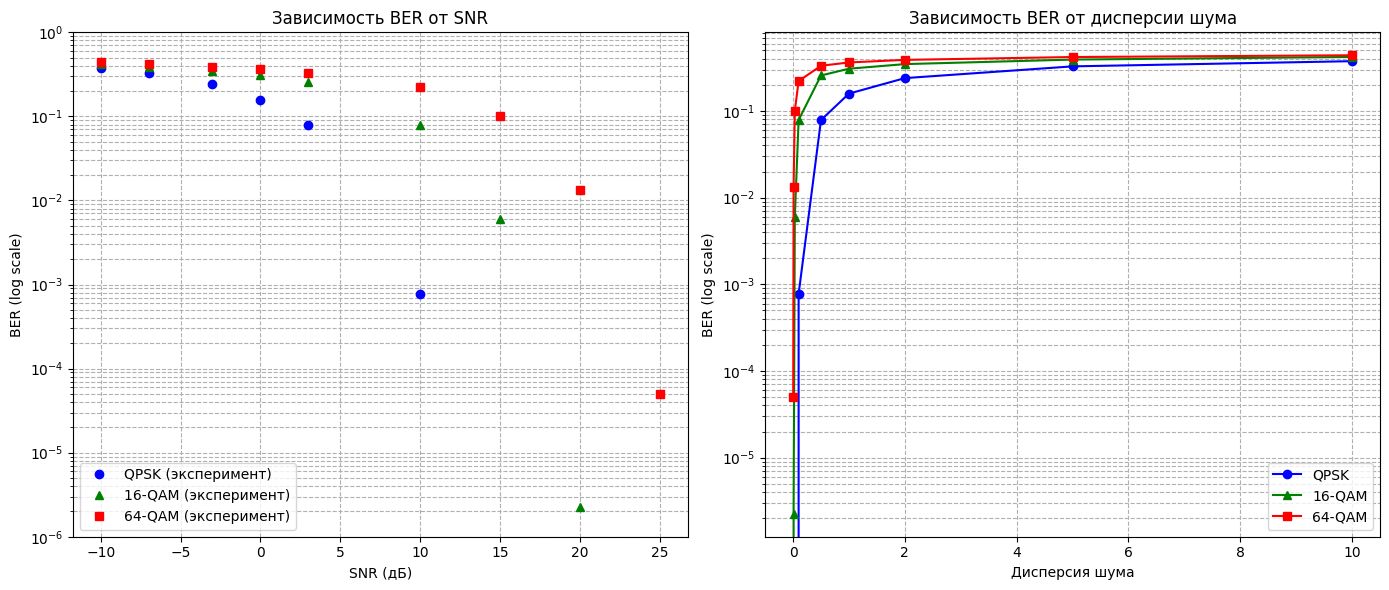

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

def load_data(filename):
    data = np.loadtxt(filename)
    variances = data[:, 0]
    snrs_db = data[:, 1]
    bers = data[:, 2]
    return variances, snrs_db, bers

def plot_ber_results(qpsk_file, qam16_file, qam64_file):
    var_qpsk, snr_qpsk, ber_qpsk = load_data(qpsk_file)
    var_qam16, snr_qam16, ber_qam16 = load_data(qam16_file)
    var_qam64, snr_qam64, ber_qam64 = load_data(qam64_file)

    plt.figure(figsize=(14, 6))

    # График 1: BER vs SNR
    plt.subplot(1, 2, 1)
    plt.semilogy(snr_qpsk, ber_qpsk, 'bo', label='QPSK (эксперимент)')
    plt.semilogy(snr_qam16, ber_qam16, 'g^', label='16-QAM (эксперимент)')
    plt.semilogy(snr_qam64, ber_qam64, 'rs', label='64-QAM (эксперимент)')
    plt.xlabel('SNR (дБ)')
    plt.ylabel('BER (log scale)')
    plt.title('Зависимость BER от SNR')
    plt.ylim([1e-6, 1])
    plt.grid(True, which='both', linestyle='--')
    plt.legend()

    # График 2: BER vs Дисперсия шума
    plt.subplot(1, 2, 2)
    plt.semilogy(var_qpsk, ber_qpsk, 'bo-', label='QPSK')
    plt.semilogy(var_qam16, ber_qam16, 'g^-', label='16-QAM')
    plt.semilogy(var_qam64, ber_qam64, 'rs-', label='64-QAM')
    plt.xlabel('Дисперсия шума')
    plt.ylabel('BER (log scale)')
    plt.title('Зависимость BER от дисперсии шума')
    plt.grid(True, which='both', linestyle='--')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_ber_results('ber_results.txt', '16-QAM.txt', '64-QAM.txt')